## Project Runner

### I. Import packages

In [448]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from itertools import product
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, precision_recall_fscore_support, roc_curve, f1_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.tree import  DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import roc_auc_score

import torch
import torch.nn as nn

""" 
9.3% of the population in the United States have diabetes , 28%
The cost of misclassification is high
"""

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)
pd.set_option('display.width', None)

seed = 12345

### II. Analyze Data

In [449]:
#read in clean data
csv_filename = 'dataset/clean_diabetic_dataset.csv'
csv_filename_2  = 'dataset/clean_diabetic_dataset_2nd.csv'
df = pd.read_csv(csv_filename)
df.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'glipizide', 'glyburide', 'pioglitazone',
       'rosiglitazone', 'acarbose', 'miglitol', 'insulin', 'change',
       'diabetesMed', 'readmitted'],
      dtype='object')

In [450]:
#visualize
def plot_count(colName,xLabel,title):
    # Count the number of occurrences for each unique value in colName
    value_counts = df[colName].value_counts()
    
    # Create a bar graph using matplotlib
    plt.bar(value_counts.index,value_counts.values)
    
    # Set labels and title for the graph
    plt.xlabel(xLabel)
    plt.ylabel('Count')
    plt.title(title)

    # Display the graph
    plt.show()
    

<Axes: ylabel='Frequency'>

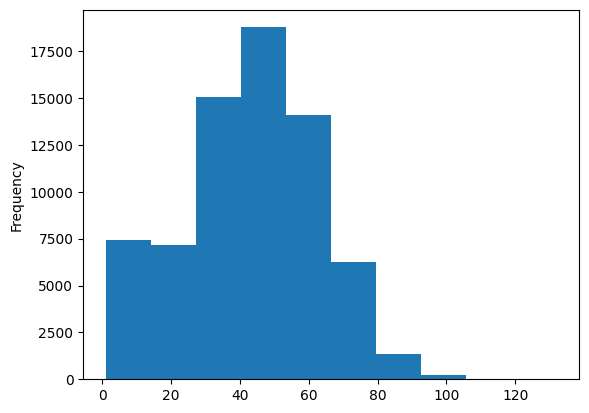

In [451]:
df.num_lab_procedures.plot(kind = 'hist')

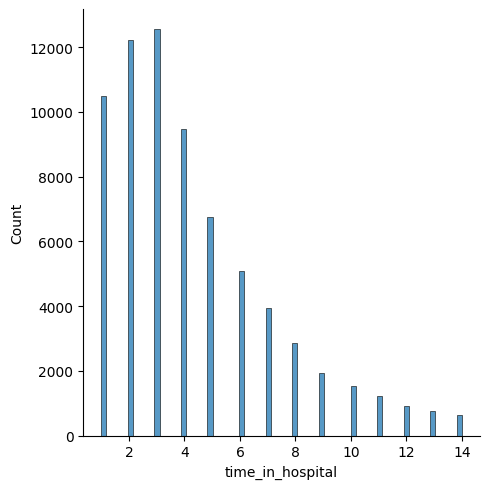

In [452]:
sns.displot(df.time_in_hospital)

<Axes: >

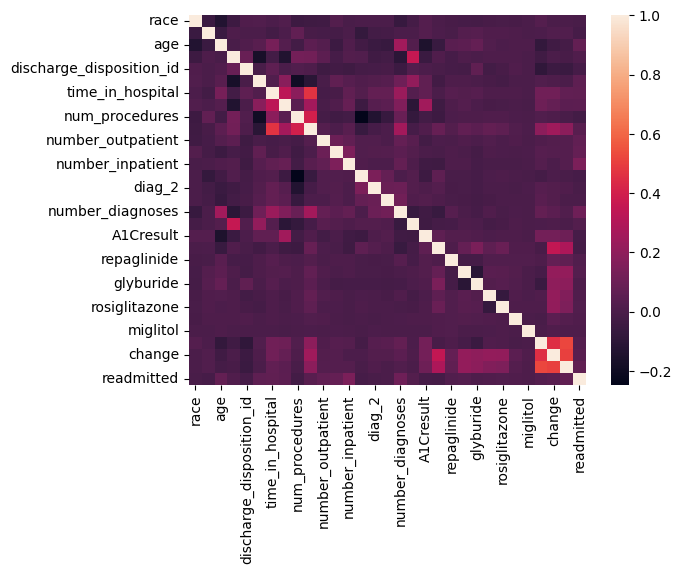

In [453]:
sns.heatmap(df.corr())

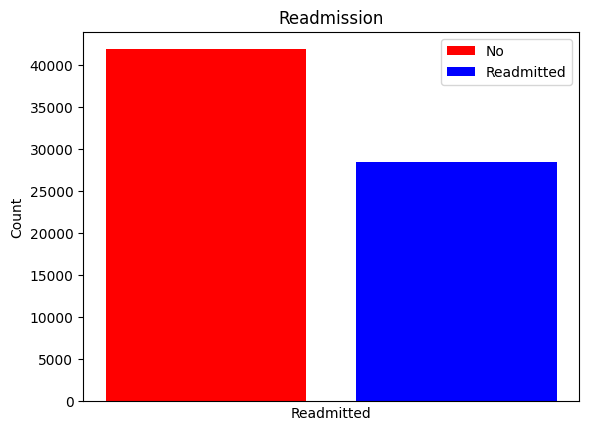

In [454]:
## READMISSION

# Count the occurrences for each unique value
unique_values, counts = np.unique(df['readmitted'], return_counts=True)
x_labels = ['No', 'Readmitted']
colors = ['red', 'blue', 'green']

bars = plt.bar(x_labels, counts,color=colors,label=x_labels)
plt.xticks([])
plt.xlabel('Readmitted')
plt.ylabel('Count')
plt.title('Readmission')
plt.legend()
plt.show()

In [455]:
# Sample data
# categories = ['Category 1', 'Category 2', 'Category 3']
# group_names = ['Group 1', 'Group 2', 'Group 3']
# counts = np.array([[10, 15, 8],
#                    [12, 9, 6],
#                    [18, 7, 11]])

# # Determine the width of each bar and the positions of the groups
# bar_width = 0.2
# group_positions = np.arange(len(group_names))

# # Plot the bars for each category
# for i, category in enumerate(categories):
#     bar_positions = group_positions + (i * bar_width)
#     plt.bar(bar_positions, counts[i], width=bar_width, label=category)

# # Set the x-axis tick positions and labels
# plt.xticks(group_positions + bar_width * (len(categories) - 1) / 2, group_names)

# plt.ylabel('Count')
# plt.legend()
# plt.show()


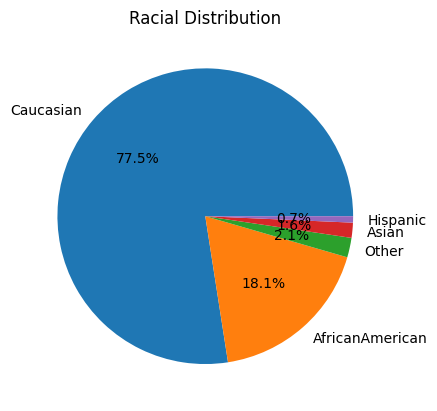

In [456]:
# Racial Distributions
category_counts = df['race'].value_counts()
proportions = category_counts / len(df)
labels = ['Caucasian' ,'AfricanAmerican' ,'Other', 'Asian', 'Hispanic']
explode = (0, 0, 0, 0,0)  # To highlight a slice, you can use the explode parameter

# Plot the pie chart
plt.pie(proportions, explode=explode, labels=labels, autopct='%1.1f%%')

# Add a title
plt.title('Racial Distribution')

# Show the plot
plt.show()



In [457]:
# Sample data
# x = [1, 2, 3, 4, 5]
# y1 = [10, 15, 7, 12, 9]
# y2 = [8, 11, 6, 14, 5]

# # Plot the lines
# plt.plot(x, y1, label='Line 1')
# plt.plot(x, y2, label='Line 2')

# # Add labels and title
# plt.xlabel('X-axis')
# plt.ylabel('Y-axis')
# plt.title('Multiple Line Graph')

# # Add a legend
# plt.legend()

# # Show the plot
# plt.show()


### III. Trainning

In [458]:
# Implement ML classifiers
# Scale data before train
# min_max_scaler = MinMaxScaler()
# features_to_scale = ['age','time_in_hospital','num_lab_procedures', 'num_procedures', 'num_medications',
#        'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']

# df[features_to_scale] = min_max_scaler.fit_transform(df[features_to_scale])

# Split data into train-val- with respect ration 0.7-0.15-0.15
y = df["readmitted"]
X = df.drop("readmitted",axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, shuffle=True, random_state=seed)


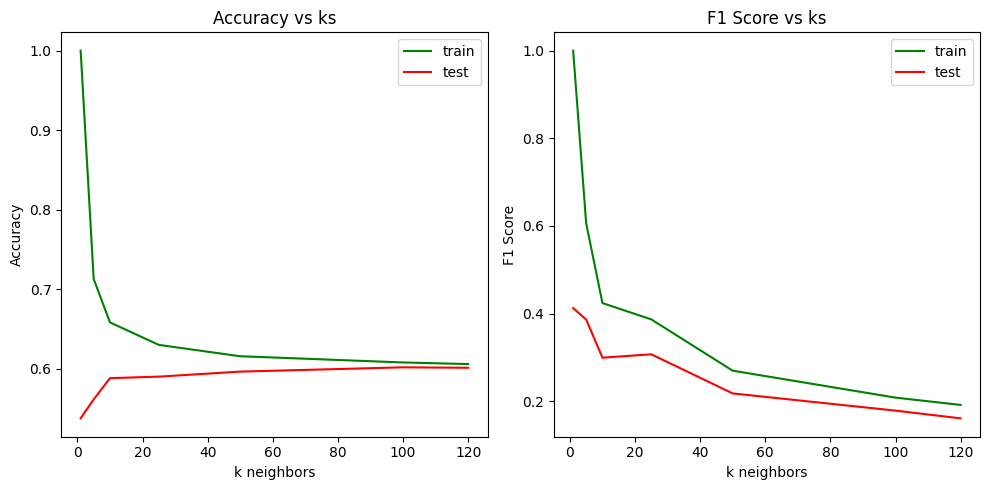

In [459]:
## KNeighborClassifier
ks=[1, 5, 10, 25, 50, 100, 120]

knn_train_acc = []
knn_test_acc = []

knn_train_f1 = []
knn_test_f1 = []

for i in range(len(ks)):
    k = ks[i]
    kNN = KNeighborsClassifier(k)
    kNN.fit(X_train, y_train)
    y_pred = kNN.predict(X_train)
    y_test_pred = kNN.predict(X_test)
    
    knn_train_acc.append(accuracy_score(y_pred, y_train))
    knn_test_acc.append(accuracy_score(y_test_pred, y_test))
    
    knn_train_f1.append(f1_score(y_pred, y_train))
    knn_test_f1.append(f1_score(y_test_pred, y_test))
   
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].plot(ks, knn_train_acc, color="green", label="train")
axes[0].plot(ks, knn_test_acc, color="red", label="test")
axes[0].set_xlabel("k neighbors")
axes[0].set_ylabel("Accuracy")
axes[0].set_title("Accuracy vs ks")
axes[0].legend()

axes[1].plot(ks, knn_train_f1, color="green", label="train")
axes[1].plot(ks, knn_test_f1, color="red", label="test")
axes[1].set_xlabel("k neighbors")
axes[1].set_ylabel("F1 Score")
axes[1].set_title("F1 Score vs ks")
axes[1].legend()
plt.tight_layout()
plt.show()


In [460]:
# Select k = 50 for best fit for kNN models
kNN = KNeighborsClassifier(40)
kNN.fit(X_train, y_train)
kNN_y_train_pred = kNN.predict(X_train)
kNN_y_test_pred = kNN.predict(X_test)

# Use these values for final evaluation
kNN_acc_train = accuracy_score(kNN_y_train_pred, y_train)
kNN_acc_test = accuracy_score(kNN_y_test_pred, y_test)
kNN_f1 = f1_score(y_test_pred, y_test)
kNN_confusion_matrix = confusion_matrix(kNN_y_test_pred, y_test)
kNN_classification_report = classification_report(kNN_y_test_pred, y_test)

print("------K Neighbors Classifier------")
print("Training accuracy:", kNN_acc_train)
print("Test accuracy:", kNN_acc_test)
print("F1 score:", kNN_f1)
print("Confusion matrix:\n", kNN_confusion_matrix)
print("Classification Report:\n", kNN_classification_report)

------K Neighbors Classifier------
Training accuracy: 0.6188439491011056
Test accuracy: 0.5987790161141477
F1 score: 0.16096759743168582
Confusion matrix:
 [[7558 4741]
 [ 911  877]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.61      0.73     12299
           1       0.16      0.49      0.24      1788

    accuracy                           0.60     14087
   macro avg       0.52      0.55      0.48     14087
weighted avg       0.80      0.60      0.67     14087



In [461]:
## KNeighborsClassifier

# Some keyword arguments for making nice looking plots.
# Feel free to change grid_resolution to a higher number -- this results in better looking plots,
# but may result in your code running more slowly.
# plot_kwargs = {'cmap': 'viridis',
#                'response_method': 'predict',
#                'plot_method': 'pcolormesh',
#                'shading': 'auto',
#                'alpha': 0.5,
#                'grid_resolution': 100}

# figure, axes = plt.subplots(2, 2, figsize=(8, 8))

# X_train, X_test, y_train, y_test

# for i,k in enumerate([1,5,10,50]):
#     x =  i%2
#     y =  i//2 
#     knnClassifier = KNeighborsClassifier(n_neighbors = k)
#     knnClassifier.fit(X_train,y_train)
#     DecisionBoundaryDisplay.from_estimator(knnClassifier,
#                                 X_train,ax = axes[x,y],**plot_kwargs)
#     le = LabelEncoder()
#     le.fit(y_train)
#     axes[x,y].scatter(X_train,
#                       y_train,
#         c = le.transform(y_train,cmap = 'viridis'))

In [462]:
# figure, axes = plt.subplots(1, figsize=(6, 6))\

# training = []
# validation = []

# for i,k in enumerate([1,2,5,10]):
#     knnClassifier = KNeighborsClassifier(n_neighbors = k)
#     knnClassifier.fit(X_train,y_train)
#     y_pred = knnClassifier.predict(X_train[:1000])
#     training.append(1-accuracy_score(y_pred,y_train[:1000]))
    
#     y_pred = knnClassifier.predict(X_test[:1000])
#     validation.append(1-accuracy_score(y_pred,y_test[:1000]))

# axes.set_xscale('log')
# axes.set_xlabel("k")
# axes.set_ylabel("Error rate")
# axes.plot([1,2,5,10],training,'red',label = "training")
# axes.plot([1,2,5,10],validation,'green',label = "validation")
# axes.legend()

In [463]:
# Logistic Regression

# def plot_data(x, y):
#     # Make a figure with 1 subplot
#     fig, axes = plt.subplots()
    
#     axes.scatter(x, y)
#     axes.set_xlabel('x', fontsize=14)
#     axes.set_ylabel('y', fontsize=14)
    
#     return fig, axes

# plot_data(df["readmitted"],df["number_diagnoses"])

In [464]:
# Logistic Regression
# Initial training
lr = LogisticRegression(penalty = 'l1',solver = 'liblinear', fit_intercept = True, random_state=seed)
lr.fit(X_train, y_train)

print("------Logistic Regression------")
lr_train_pred = lr.predict(X_train)
lr_test_pred = lr.predict(X_test)

lr_train_acc =  accuracy_score(y_train, lr_train_pred)
lr_test_acc =  accuracy_score(y_test, lr_test_pred)
lr_f1_score = f1_score(y_test, lr_test_pred)
lr_confusion_matrix = confusion_matrix(y_test, lr_test_pred)
lr_classification_report = classification_report(y_test, lr_test_pred)

print("Training accuracy:", lr_train_acc)
print("Test accuracy:", lr_test_acc)
print("F1 score:", lr_f1_score)
print("Confusion matrix:\n", lr_confusion_matrix)
print("Classification report:\n", lr_classification_report)

------Logistic Regression------
Training accuracy: 0.6215947610343053
Test accuracy: 0.627173990203734
F1 score: 0.31292517006802717
Confusion matrix:
 [[7639  830]
 [4422 1196]]
Classification report:
               precision    recall  f1-score   support

           0       0.63      0.90      0.74      8469
           1       0.59      0.21      0.31      5618

    accuracy                           0.63     14087
   macro avg       0.61      0.56      0.53     14087
weighted avg       0.62      0.63      0.57     14087



In [472]:
# Generate hyperparams set
lr_train_acc = []
lr_test_acc = []

hyperparameters = {
    'penalty': ['l1'],
    'C': [0.001, 0.01, 0.1, 1.0, 10.0],
    'solver': ['liblinear', 'saga'],
    'class_weight': ['balanced'],
    'max_iter': [100, 200],
    'random_state': [seed]
}

keys = hyperparameters.keys()
values = hyperparameters.values()

# Compute the Cartesian product of all hyperparameter options
hyperparameter_combinations = list(product(*values))

# Create a list of dictionaries with hyperparameter combinations
hyperparameter_dicts = []
for combination in hyperparameter_combinations:
    hyperparameter_dict = dict(zip(keys, combination))
    hyperparameter_dicts.append(hyperparameter_dict)

# Print the list of dictionaries
for hyperparameter_dict in hyperparameter_dicts:
    print(hyperparameter_dict)

{'penalty': 'l1', 'C': 0.001, 'solver': 'liblinear', 'class_weight': 'balanced', 'max_iter': 100, 'random_state': 12345}
{'penalty': 'l1', 'C': 0.001, 'solver': 'liblinear', 'class_weight': 'balanced', 'max_iter': 200, 'random_state': 12345}
{'penalty': 'l1', 'C': 0.001, 'solver': 'saga', 'class_weight': 'balanced', 'max_iter': 100, 'random_state': 12345}
{'penalty': 'l1', 'C': 0.001, 'solver': 'saga', 'class_weight': 'balanced', 'max_iter': 200, 'random_state': 12345}
{'penalty': 'l1', 'C': 0.01, 'solver': 'liblinear', 'class_weight': 'balanced', 'max_iter': 100, 'random_state': 12345}
{'penalty': 'l1', 'C': 0.01, 'solver': 'liblinear', 'class_weight': 'balanced', 'max_iter': 200, 'random_state': 12345}
{'penalty': 'l1', 'C': 0.01, 'solver': 'saga', 'class_weight': 'balanced', 'max_iter': 100, 'random_state': 12345}
{'penalty': 'l1', 'C': 0.01, 'solver': 'saga', 'class_weight': 'balanced', 'max_iter': 200, 'random_state': 12345}
{'penalty': 'l1', 'C': 0.1, 'solver': 'liblinear', 'clas

In [474]:
# Train model for each set of hyperparams
lr_acc_train = []
lr_acc_test = []

for hp_set in hyperparameter_dicts:
  lr = LogisticRegression(**hp_set)
  lr.fit(X_train, y_train)
  train_pred = lr.predict(X_train)
  test_pred = lr.predict(X_test)

  lr_acc_train.append(accuracy_score(y_train, lr_train_pred))
  lr_acc_test.append(accuracy_score(y_test, lr_test_pred))
  


c:\Users\tonyh\Desktop\diabetes\venv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\tonyh\Desktop\diabetes\venv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\tonyh\Desktop\diabetes\venv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\tonyh\Desktop\diabetes\venv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\tonyh\Desktop\diabetes\venv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\tonyh\Desktop\diabetes\venv\lib\site-pack

AttributeError: Line2D.set() got an unexpected keyword argument 'labels'

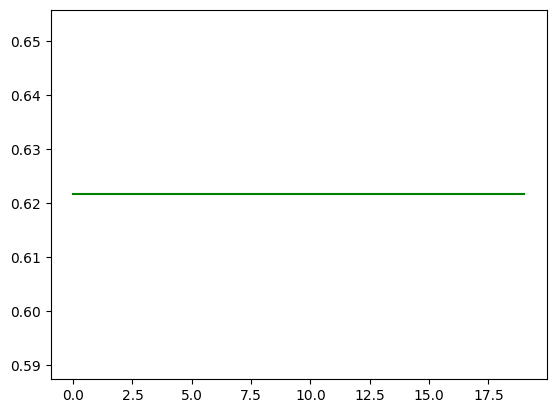

In [475]:
plt.plot(lr_acc_train, color="green", label="train")
plt.plot(lr_acc_test, color="red", label="test")
plt.xlabel("hyperparams")
plt.ylabel("accuracy")
plt.title("Logistic Regression Accuracy vs Hyper Parameters")
plt.legend()
plt.show()

In [ ]:
#neural network
torch.manual_seed(12345)

# Split the training and validation sets (70% training, 15% validation)
# X_train, X_test, y_train, y_test = 
# train_test_split(df.drop("readmitted",axis=1), test_size=0.15, random_state=12345)


# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=12345)

X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train)
# X_val_tensor = torch.tensor(X_val.values, dtype=torch.float32)
# y_val_tensor = torch.tensor(y_val)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test)

# Fully connected neural network with one hidden layer
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        
        out = self.fc2(out)
        return out

# hyperparameters
input_size = 46  # Number of features in the input
hidden_size = 100 # Number of units in the hidden layer
num_classes = 3  # Number of output classes
num_epochs = 10
learning_rate = 0.01

# Create an instance of the neural network
model = NeuralNet(input_size, hidden_size, num_classes)

# Print the model architecture
print(model)

# Initialize the loss function
criterion = nn.CrossEntropyLoss()

# Initialize the optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# Training loop
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train_tensor )
    loss = criterion(outputs, y_train_tensor)

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print progress
    if (epoch + 1) % 1 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

# Make predictions
with torch.no_grad():
    outputs = model(X_test_tensor)
    _, predicted = torch.max(outputs.data, 1)

# Calculate accuracy
accuracy = (predicted == y_test_tensor).sum().item() / len(y_test)


# Perform forward pass on the test data
with torch.no_grad():
    outputs = model(X_test_tensor)
    probabilities = torch.softmax(outputs, dim=1)

# Extract the predicted probabilities for each class
print(roc_auc_score(y_true, y_pred_prob))

# Print the predicted probabilities
print(y_pred_prob)

print(f'Test Accuracy: {accuracy:.4f}')


NeuralNet(
  (fc1): Linear(in_features=46, out_features=100, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=100, out_features=3, bias=True)
)


RuntimeError: mat1 and mat2 shapes cannot be multiplied (49303x30 and 46x100)

### IV. Testing and Graph